In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
# Assuming "spambase.data" is a CSV file without headers
columns = [f"feature_{i}" for i in range(57)] + ["is_spam"]
data = pd.read_csv("spambase.data", header=None, names=columns)

# Separate features and target variable
X = data.iloc[:, :-1]  # Features (first 57 columns)
y = data.iloc[:, -1]   # Target variable (last column: spam or not)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       837
           1       0.93      0.89      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381

Accuracy Score: 0.9275887038377987


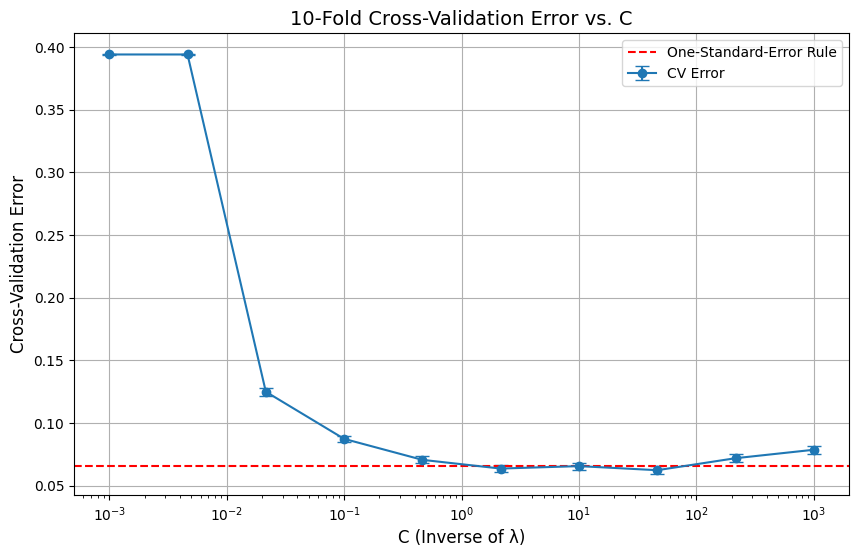

The optimal value of C using the one-standard-error rule is: 46.416


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
columns = [f"feature_{i}" for i in range(57)] + ["is_spam"]
data = pd.read_csv("spambase.data", header=None, names=columns)

# Separate features and target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of C values to test (inverse of λ)
C_values = np.logspace(-3, 3, 10)  # Values from 0.001 to 1000 (log scale)

# Initialize variables to store CV results
mean_cv_errors = []
std_cv_errors = []

# Perform 10-fold CV for each C value
for C in C_values:
    svm_model = SVC(kernel='rbf', C=C, random_state=42)
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(svm_model, X_scaled, y, cv=cv, scoring='accuracy')
    
    # Calculate mean and standard error of CV errors
    mean_cv_errors.append(1 - np.mean(cv_scores))  # 1 - accuracy gives error
    std_cv_errors.append(np.std(1 - cv_scores) / np.sqrt(len(cv_scores)))

# Convert results to numpy arrays for easier manipulation
mean_cv_errors = np.array(mean_cv_errors)
std_cv_errors = np.array(std_cv_errors)

# Plot CV error vs C values with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(C_values, mean_cv_errors, yerr=std_cv_errors, fmt='o-', capsize=5, label='CV Error')
plt.xscale('log')  # Logarithmic scale for C
plt.xlabel('C (Inverse of λ)', fontsize=12)
plt.ylabel('Cross-Validation Error', fontsize=12)
plt.title('10-Fold Cross-Validation Error vs. C', fontsize=14)
plt.axhline(y=min(mean_cv_errors + std_cv_errors), color='r', linestyle='--', label='One-Standard-Error Rule')
plt.legend()
plt.grid()
plt.show()

# Identify the optimal C using the one-standard-error rule
optimal_idx = np.argmin(mean_cv_errors + std_cv_errors)
optimal_C = C_values[optimal_idx]

print(f"The optimal value of C using the one-standard-error rule is: {optimal_C:.3f}")